<a href="https://colab.research.google.com/github/Shivani-781/Ganga-Water-Quality-Assessment/blob/main/10_Data_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Modelling

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import roc_curve,auc
from scipy import interp
from itertools import cycle
%matplotlib inline

Now, we have labelled data. Let's model it.

In [ ]:
df = pd.read_csv('Ganga_Classification_data.csv')

In [ ]:
df

,Date,Frame No,BAT,COND,DO,ORP,PH,WT,Cluster
0,12-01-2019 12:57,0,91.0,0.044698,14.832754,0.084822,8.879727,22.650238,1
1,12-01-2019 12:58,1,92.0,0.044651,14.170345,0.086292,8.866815,22.567017,1
2,12-01-2019 14:54,0,90.0,46.195190,13.501176,0.142900,12.359906,18.400787,1
3,12-01-2019 14:55,1,91.0,52.609680,20.752865,0.146236,12.825684,18.013641,1
4,12-01-2019 14:56,2,91.0,52.399826,12.409351,0.146724,12.998978,18.184570,1
...,...,...,...,...,...,...,...,...,...
46978,05-03-2020 17:40,193,87.0,721.867250,10.008608,0.116298,9.377568,27.130707,0
46979,05-03-2020 17:41,194,85.0,722.117000,10.008608,0.116288,9.374988,27.142334,0
46980,05-03-2020 17:42,195,80.0,722.028700,10.008608,0.116238,9.375849,27.139954,0
46981,05-03-2020 17:43,196,81.0,721.960700,10.008608,0.116218,9.380211,27.135010,0


In [ ]:
X = df.drop(['Date', 'Frame No', 'Cluster'], axis=1).values
y = df['Cluster'].values

In [ ]:
X_test = X
y_test = y

In [ ]:
n_classes = 4

# SVM Kernel Trick

Using rbf kernel

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
svm = SVC(kernel='rbf')
y_score_1 = cross_val_score(svm, X, y, cv=5)
svm_score = y_score_1.mean()
print(svm_score)

0.9607529177563755


Plotting ROC Curves

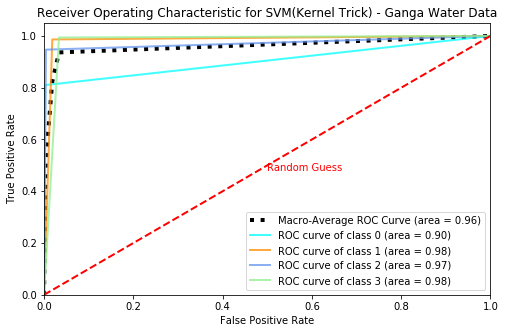

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
pred1 = cross_val_predict(svm, X, y, cv=5)

t1 = sum(x==0 for x in pred1 - y_test)/len(pred1)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(np.array(pd.get_dummies(y_test))[:, i], np.array(pd.get_dummies(pred1))[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

lw=2
plt.figure(figsize=(8,5))
plt.plot(fpr["macro"], tpr["macro"], alpha = 1.0,
         label='Macro-Average ROC Curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='black', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'lightgreen'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, alpha = 0.75, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
    
plt.plot([0, 1], [0, 1], 'k--',color='red', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.annotate('Random Guess',(.5,.48),color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for SVM(Kernel Trick) - Ganga Water Data')
plt.legend(loc="lower right")
plt.show()

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression()
y_score_2 = cross_val_score(lreg, X, y, cv=5)
lreg_score = y_score_2.mean()
print(lreg_score)

C:\Users\Shivani Chauhan\Anaconda3\envs\TensorFlow\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Shivani Chauhan\Anaconda3\envs\TensorFlow\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lea

0.9534094873625465


C:\Users\Shivani Chauhan\Anaconda3\envs\TensorFlow\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


C:\Users\Shivani Chauhan\Anaconda3\envs\TensorFlow\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Shivani Chauhan\Anaconda3\envs\TensorFlow\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lea

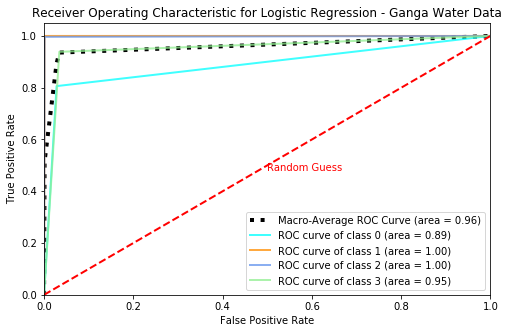

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
pred1 = cross_val_predict(lreg, X, y, cv=5)

t1 = sum(x==0 for x in pred1 - y_test)/len(pred1)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(np.array(pd.get_dummies(y_test))[:, i], np.array(pd.get_dummies(pred1))[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

lw=2
plt.figure(figsize=(8,5))
plt.plot(fpr["macro"], tpr["macro"],
         label='Macro-Average ROC Curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='black', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'lightgreen'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, alpha = 0.75, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
    
plt.plot([0, 1], [0, 1], 'k--',color='red', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.annotate('Random Guess',(.5,.48),color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Logistic Regression - Ganga Water Data')
plt.legend(loc="lower right")
plt.show()

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_score_3 = cross_val_score(gnb, X, y, cv=5)
gnb_score = y_score_3.mean()
print(gnb_score)

0.8750184417524448


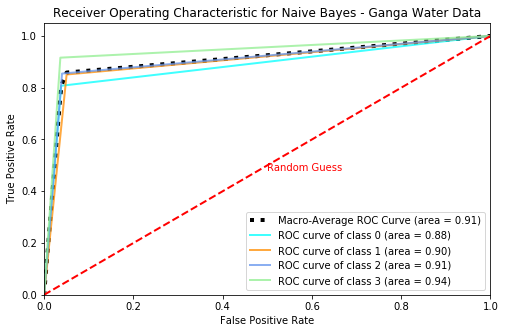

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
pred1 = cross_val_predict(gnb, X, y, cv=5)

t1 = sum(x==0 for x in pred1 - y_test)/len(pred1)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(np.array(pd.get_dummies(y_test))[:, i], np.array(pd.get_dummies(pred1))[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

lw=2
plt.figure(figsize=(8,5))
plt.plot(fpr["macro"], tpr["macro"],
         label='Macro-Average ROC Curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='black', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'lightgreen'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, alpha = 0.75, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
    
plt.plot([0, 1], [0, 1], 'k--',color='red', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.annotate('Random Guess',(.5,.48),color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Naive Bayes - Ganga Water Data')
plt.legend(loc="lower right")
plt.show()

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
y_score_4 = cross_val_score(dtc, X, y, cv=5)
dtc_score = y_score_4.mean()
print(dtc_score)

0.9846759558825895


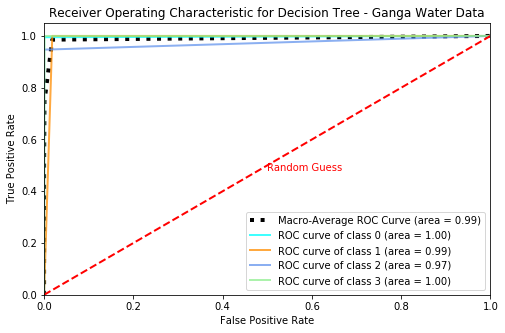

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
pred1 = cross_val_predict(dtc, X, y, cv=5)

t1 = sum(x==0 for x in pred1 - y_test)/len(pred1)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(np.array(pd.get_dummies(y_test))[:, i], np.array(pd.get_dummies(pred1))[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

lw=2
plt.figure(figsize=(8,5))
plt.plot(fpr["macro"], tpr["macro"],
         label='Macro-Average ROC Curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='black', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'lightgreen'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, alpha = 0.75, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
    
plt.plot([0, 1], [0, 1], 'k--',color='red', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.annotate('Random Guess',(.5,.48),color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Decision Tree - Ganga Water Data')
plt.legend(loc="lower right")
plt.show()

# Algorithm Comparision

In [ ]:
classifiers = ['SVM_Kernel', 'Logistic_Regression', 'Naive_Bayes', 'Decision_Tree']
accuracies = [svm_score*100, lreg_score*100, gnb_score*100, dtc_score*100]
comparision = pd.DataFrame({'Classifier':classifiers,'Accuracy':accuracies}, index = [i for i in range(1,5)])
comparision

,Classifier,Accuracy
1,SVM_Kernel,96.075292
2,Logistic_Regression,95.664455
3,Naive_Bayes,87.501844
4,Decision_Tree,98.467596


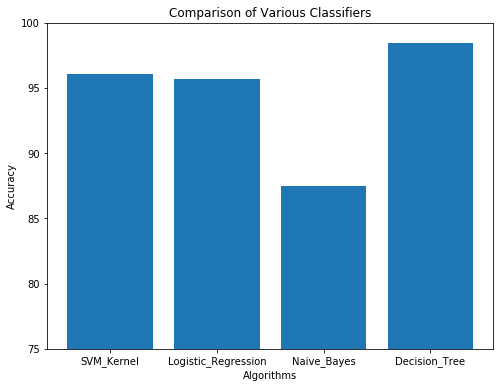

In [ ]:
plt.figure(4, [8,6])
plt.bar(range(len(classifiers)), accuracies, align = 'center')
plt.xticks(range(len(classifiers)), classifiers)
plt.ylabel('Accuracy')
plt.xlabel('Algorithms')
plt.title('Comparison of Various Classifiers')
plt.ylim([75, 100])
plt.show()